## ⭐Near-Earth Objects Data Analysis⭐
By Danni Du, Lida Chen\
CPSC 322, Fall 2024

The primary objective of this project is to analyze NEO data and build machine learning classifiers to predict whether an asteroid is hazardous based on its physical and orbital characteristics like the estimated size, velocity, distance, and magnitude of asteroids.


In [46]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as eval

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyNaiveBayesClassifier

# import mysklearn.classifiers
# importlib.reload(mysklearn.classifiers)
# from mysklearn.classifiers import MyRandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np

### Prepare Data

Choose 5000 true and 5000 false randomly from new_copy(hazardous), save these data to "neo_new.csv".

In [47]:
table = MyPyTable().load_from_file("dataset//neo_copy.csv")
sampled_data = table.get_sample_data("hazardous", 5000, 5000)
sampled_table = MyPyTable(column_names=table.column_names, data=sampled_data)
sampled_table.save_to_file("dataset//neo_new.csv")

Get each attribute (X) and label(y)\
We normalized the attributes. Make sure their values are all between 0 and 1.\
This ensures each attribute can have the same weight.

In [48]:
df = MyPyTable().load_from_file("dataset//neo_new.csv")

# unnormalized data
header = df.column_names
est_diameter_min = df.get_column("est_diameter_min")
est_diameter_max = df.get_column("est_diameter_max")
relative_velocity = df.get_column("relative_velocity")
miss_distance = df.get_column("miss_distance")
absolute_magnitude = df.get_column("absolute_magnitude")

# normalized data
df.normalize_columns(["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"])
est_diameter_min_nor = df.get_column("est_diameter_min")
est_diameter_max_nor = df.get_column("est_diameter_max")
relative_velocity_nor = df.get_column("relative_velocity")
miss_distance_nor = df.get_column("miss_distance")
absolute_magnitude_nor = df.get_column("absolute_magnitude")

X = []
for i in range(len(est_diameter_min_nor)):
    temp = []
    temp.append(est_diameter_min_nor[i])
    temp.append(est_diameter_max_nor[i])
    temp.append(miss_distance_nor[i])
    temp.append(relative_velocity_nor[i])
    temp.append(absolute_magnitude_nor[i])
    X.append(temp)

hazardous = df.get_column("hazardous")
hazardous_num = [0 if val == "False" else 1 for val in hazardous]

### Label Distribution
We pick 5000 true instances and 5000 false instances to train classifiers.
By doing this, the classifiers can have equal chance to learn what kind of instances are true and false.

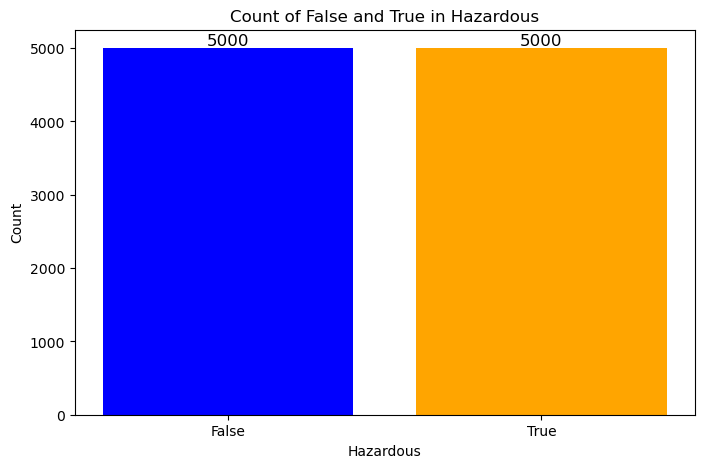

In [49]:
false_count = hazardous.count("False")
true_count = hazardous.count("True")

categories = ['False', 'True']
counts = [false_count, true_count]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=12)

plt.title("Count of False and True in Hazardous")
plt.xlabel("Hazardous")
plt.ylabel("Count")

plt.show()

### Comparison between Normalized Data and Unnormalized Data
We choose two attributes as an example to show the difference between normalized data and unnormalized data.

<Figure size 640x480 with 0 Axes>

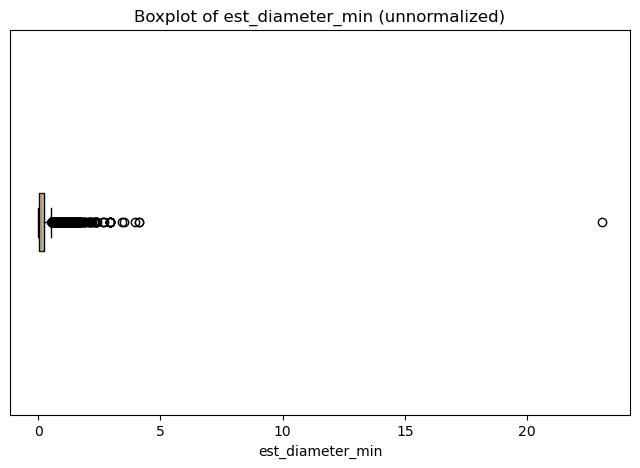

In [50]:
plt.clf()
plt.figure(figsize=(8, 5))
plt.boxplot(est_diameter_min, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Boxplot of est_diameter_min (unnormalized)")
plt.xlabel("est_diameter_min")
plt.grid(axis='y')
plt.yticks([])
plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

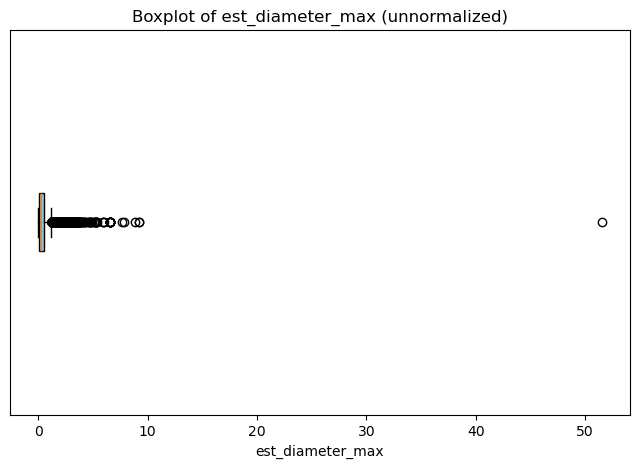

In [51]:
plt.clf()
plt.figure(figsize=(8, 5))
plt.boxplot(est_diameter_max, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Boxplot of est_diameter_max (unnormalized)")
plt.xlabel("est_diameter_max")
plt.grid(axis='y')
plt.yticks([]) 
plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

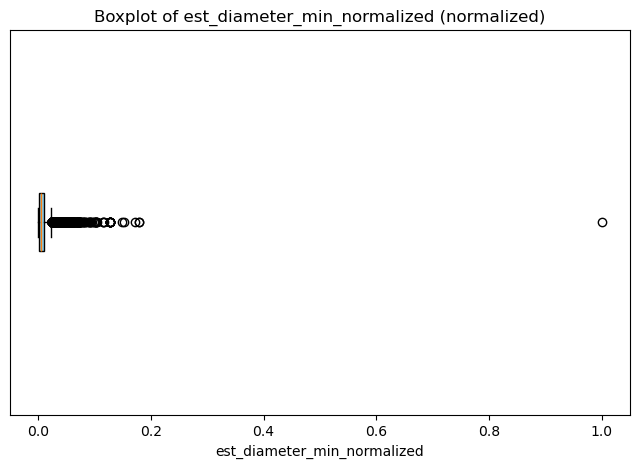

In [52]:
plt.clf()
plt.figure(figsize=(8, 5))
plt.boxplot(est_diameter_min_nor, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Boxplot of est_diameter_min_normalized (normalized)")
plt.xlabel("est_diameter_min_normalized")
plt.grid(axis='y')
plt.yticks([])
plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

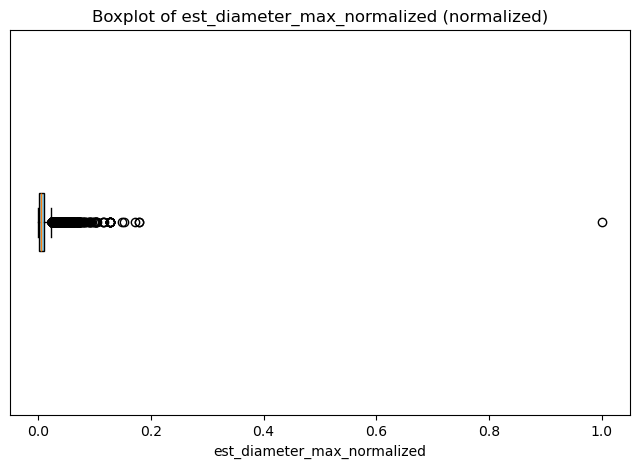

In [53]:
plt.clf()
plt.figure(figsize=(8, 5))
plt.boxplot(est_diameter_max_nor, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Boxplot of est_diameter_max_normalized (normalized)")
plt.xlabel("est_diameter_max_normalized")
plt.grid(axis='y')
plt.yticks([])
plt.show()
plt.close()

### Relationship between each attribute and the label

Since we compare each attributes with label, we could see that est_diameter_min, est_diameter_max, and miss_distance has the similar graph for hazardous = 1 and hazardous = 0. But relative_velocity and absolute_magnitude have something difference.

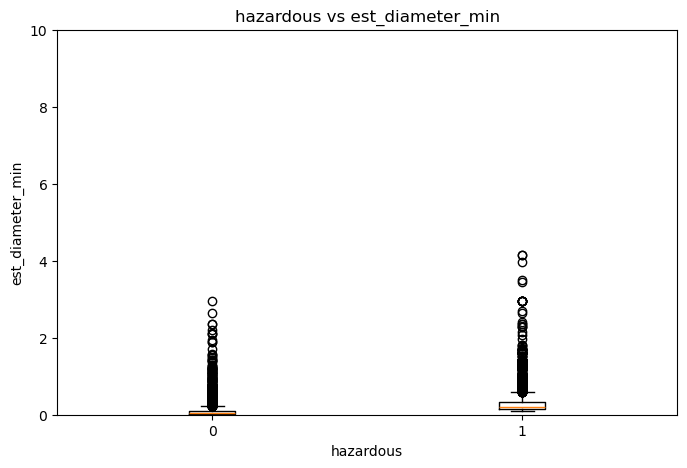

In [54]:
data_0 = [est_diameter_min[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [est_diameter_min[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs est_diameter_min")
plt.xlabel("hazardous")
plt.ylabel("est_diameter_min")
plt.ylim(0, 10)
plt.show()

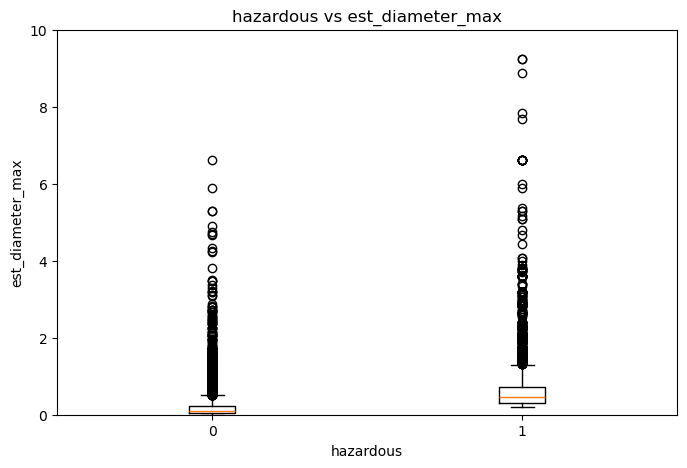

In [55]:
data_0 = [est_diameter_max[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [est_diameter_max[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs est_diameter_max")
plt.xlabel("hazardous")
plt.ylabel("est_diameter_max")
plt.ylim(0, 10)
plt.show()

It is obvious that the median of 1 is higher than median of 0. We could assume that when relative_velocity higher, the probability of predicting 1 is higher.

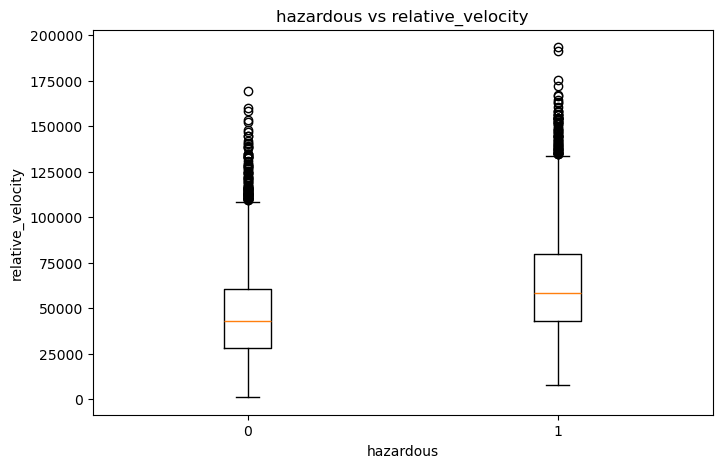

In [56]:
data_0 = [relative_velocity[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [relative_velocity[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs relative_velocity")
plt.xlabel("hazardous")
plt.ylabel("relative_velocity")
plt.show()

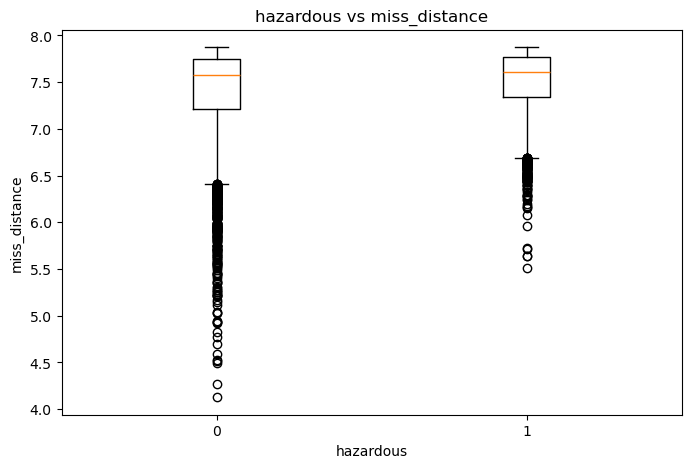

In [57]:
data_0 = [np.log10(miss_distance[i] + 1) for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [np.log10(miss_distance[i] + 1) for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs miss_distance")
plt.xlabel("hazardous")
plt.ylabel("miss_distance")
plt.show()

It is obvious that the median of 1 is lower than median of 0. We could assume that when absolute_magnitude higher, the probability of predicting 0 is higher.

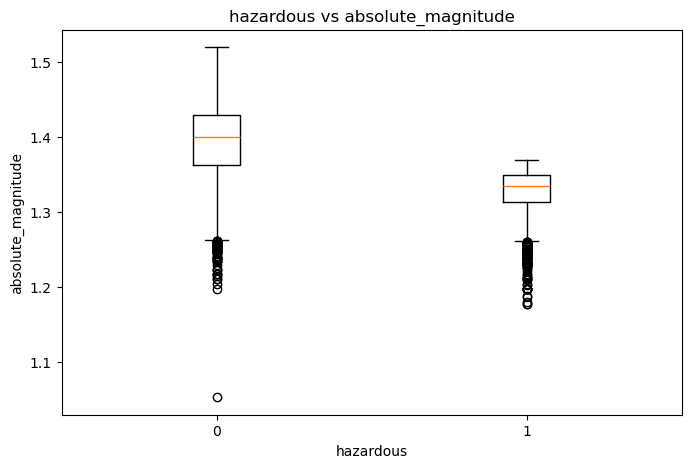

In [58]:
data_0 = [np.log10(absolute_magnitude[i] + 1) for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [np.log10(absolute_magnitude[i] + 1) for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs absolute_magnitude")
plt.xlabel("hazardous")
plt.ylabel("absolute_magnitude")
plt.show()

### Train and Test Performance for Each Classifier

There are five classifier, KNN, Dummy, Naive Bayes, Decision tree and Random forest

In [59]:
y_pred_knn, y_pred_dummy, y_pred_naive, y_pred_tree, y_pred_forest = myutils.cross_val_predict2(X, hazardous_num, 10, True, 1)

Processing fold 1/10...
Processing fold 2/10...
Processing fold 3/10...
Processing fold 4/10...
Processing fold 5/10...
Processing fold 6/10...
Processing fold 7/10...
Processing fold 8/10...
Processing fold 9/10...
Processing fold 10/10...


In [60]:
myutils.evaluate_and_display_metrics(hazardous_num, y_pred_dummy, None, "dummy")

dummy Confusion Matrix:
+----+------+-----+---------+-------------------+
|    |    0 |   1 |   Total | Recognition (%)   |
+====+======+=====+=========+===================+
|  0 | 5000 |   0 |    5000 | 100.00%           |
+----+------+-----+---------+-------------------+
|  1 | 5000 |   0 |    5000 | 0.00%             |
+----+------+-----+---------+-------------------+
dummy Performance Metrics:
Accuracy: 0.50
Error: 0.50
Precision: 0.50
Recall: 1.00
F1 Score: 0.67



In [61]:
myutils.evaluate_and_display_metrics(hazardous_num, y_pred_knn, None, "knn")

knn Confusion Matrix:
+----+------+------+---------+-------------------+
|    |    0 |    1 |   Total | Recognition (%)   |
+====+======+======+=========+===================+
|  0 | 3894 | 1106 |    5000 | 77.88%            |
+----+------+------+---------+-------------------+
|  1 |  528 | 4472 |    5000 | 89.44%            |
+----+------+------+---------+-------------------+
knn Performance Metrics:
Accuracy: 0.84
Error: 0.16
Precision: 0.88
Recall: 0.78
F1 Score: 0.83



In [62]:
myutils.evaluate_and_display_metrics(hazardous_num, y_pred_naive, None, "naive")

naive Confusion Matrix:
+----+------+------+---------+-------------------+
|    |    0 |    1 |   Total | Recognition (%)   |
+====+======+======+=========+===================+
|  0 | 3481 | 1519 |    5000 | 69.62%            |
+----+------+------+---------+-------------------+
|  1 |  483 | 4517 |    5000 | 90.34%            |
+----+------+------+---------+-------------------+
naive Performance Metrics:
Accuracy: 0.80
Error: 0.20
Precision: 0.88
Recall: 0.70
F1 Score: 0.78



In [63]:
myutils.evaluate_and_display_metrics(hazardous_num, y_pred_tree, None, "tree")

tree Confusion Matrix:
+----+------+------+---------+-------------------+
|    |    0 |    1 |   Total | Recognition (%)   |
+====+======+======+=========+===================+
|  0 | 3451 | 1549 |    5000 | 69.02%            |
+----+------+------+---------+-------------------+
|  1 |  382 | 4618 |    5000 | 92.36%            |
+----+------+------+---------+-------------------+
tree Performance Metrics:
Accuracy: 0.81
Error: 0.19
Precision: 0.90
Recall: 0.69
F1 Score: 0.78



In [64]:
myutils.evaluate_and_display_metrics(hazardous_num, y_pred_forest, None, "forest")

forest Confusion Matrix:
+----+------+------+---------+-------------------+
|    |    0 |    1 |   Total | Recognition (%)   |
+====+======+======+=========+===================+
|  0 | 3435 | 1565 |    5000 | 68.70%            |
+----+------+------+---------+-------------------+
|  1 |  370 | 4630 |    5000 | 92.60%            |
+----+------+------+---------+-------------------+
forest Performance Metrics:
Accuracy: 0.81
Error: 0.19
Precision: 0.90
Recall: 0.69
F1 Score: 0.78

